<a href="https://colab.research.google.com/github/SaketMunda/tensorflow-fundamentals/blob/master/02_neural_network_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow Exercises

This notebook consist of various exercises that are listed in the [readMe](https://github.com/SaketMunda/tensorflow-fundamentals/blob/master/README.md) of the [Github Repo](https://github.com/SaketMunda/tensorflow-fundamentals)

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Replicate the model pictured in the TensorFlow Playground diagram 

Given below is the diagram, use TensorFlow code and Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

![image](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)

In [2]:
# First need to create some dataset for this, X (data) and y (labels)
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples, noise= 0.03, random_state = 17)

In [3]:
# Let's check the samples
X[:5], y[:5]

(array([[-0.69661282, -0.32845725],
        [ 0.95581012, -0.05841444],
        [ 0.53469756, -0.57338982],
        [-0.89332834,  0.42098993],
        [-0.65647965, -0.4353153 ]]), array([1, 0, 1, 0, 1]))

In [4]:
# Shape of the samples
X.shape, y.shape

((1000, 2), (1000,))

Okay what we learned from the data ? Seeing the data in this format is not speaking out anything. Let's visualize it.

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})
circles.head(10)

,X0,X1,label
0,-0.696613,-0.328457,1
1,0.955810,-0.058414,0
2,0.534698,-0.573390,1
3,-0.893328,0.420990,0
4,-0.656480,-0.435315,1
5,0.611903,0.800231,0
6,-0.598358,-0.567453,1
7,0.331679,0.922320,0
8,0.782751,-0.135743,1
9,0.579686,0.842586,0


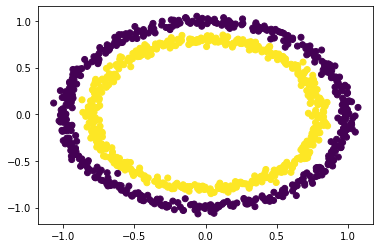

In [6]:
# If we use this dataframe to plot
plt.scatter(circles["X0"], circles["X1"], c=circles["label"]);

In [7]:
# check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

We can see that we have label `0` and `1`, it means that we're going to solve a binary classification problem.

In [8]:
# Let's split our data into training and test set, ratio will be 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# Check the shapes of training and test samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Alright, now we are ready to build our model and replicate the layers shown above in the TensorFlow playground screenshot.

In [10]:
# set the random seed
tf.random.set_seed(17)

# Create a model with 5 hidden layers having 6 neuron each layer with activation as ReLu and 1 output layer with activation as sigmoid
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6906 - accuracy: 0.4963 - val_loss: 0.6904 - val_accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5163 - val_loss: 0.6902 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5188 - val_loss: 0.6900 - val_accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5175 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6893 - val_accuracy: 0.5050
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5375 - val_loss: 0.6885 - val_accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5362 - val_loss: 0.6880 - val_accuracy: 0.5100
Epoch 8/100


Our model performed pretty well with `Accuracy` **99%**.

Now to replicate the figure we need to plot the decision boundary. Let's do then,

In [11]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: 
    print("Doing multi-class classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary-class classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c = y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 907us/step
Doing binary-class classification...


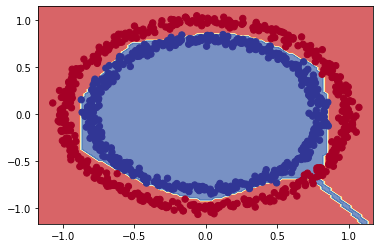

In [12]:
plot_decision_boundary(model_1, X, y)

There is another way of plotting decision boundaries using `mlxtend.plotting`.

Lets see...

In [24]:
from mlxtend.plotting import plot_decision_regions


3888/3888 [==============================] - 4s 973us/step


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


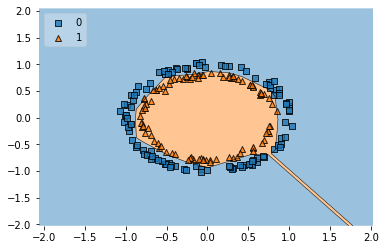

In [29]:
plot_decision_regions(X_test, y_test, clf=model_1,legend=2)
plt.show();

## Create a classification dataset using Scikit-Learns `make_moons()`

Create a classification dataset using Scikit-learns [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [30]:
# import the make_moons() dataset
from sklearn.datasets import make_moons
n_samples = 1000

X, y = make_moons(n_samples)

In [31]:
# view the data
X[:10], y[:10]

(array([[ 0.32125705, -0.23437593],
        [ 0.75997907, -0.47076771],
        [-0.98663265,  0.16296018],
        [ 0.25503244, -0.16710069],
        [ 1.99611811,  0.4119732 ],
        [ 0.02832721,  0.9995987 ],
        [ 0.40358981, -0.30267982],
        [-0.95468484,  0.29761864],
        [ 0.73223568,  0.68105132],
        [-0.44640126,  0.8948329 ]]), array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0]))

In [32]:
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
# Split the data first into training and test samples
X_train, X_test = X[:750], X[750:]
y_train, y_test = y[:750], y[750:]

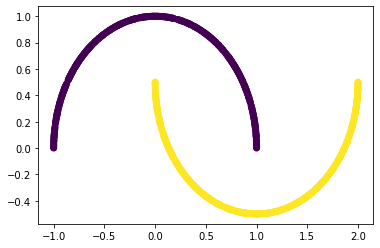

In [35]:
# plot the train data into scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

Data looks non-linear, so we will need activation functions which supports non-linearity.

Let's do the modelling now,

In [36]:
# set the random seed
tf.random.set_seed(17)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer, binary classification so sigmoid activation
])

# compile a model
model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=50)

Epoch 1/50
24/24 [==============================] - 1s 2ms/step - loss: 0.6382 - accuracy: 0.7400
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.8093
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8307
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8320
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5518 - accuracy: 0.8307
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.8360
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.8373
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8413
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8427
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.8533
Epoch 11/50
24/24 [

In [37]:
# let's evaluate the model
model_2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.8960


[0.2315957397222519, 0.8960000276565552]

So on testing samples, model's accuracy was **89%** which was our goal.

## Recreate TensorFlow's softmax activation function in your code.

Recreate [TensorFlow's Softmax Activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having softmax function applied to it.

In [38]:
# Let's create a tensor with random numbers ranging from -1 to 1
random = tf.constant(tf.range(-1, 1, 0.1))

So what is softmax function ?

It basically return the max between 0 and the passed value, if some passed value is less than 0 then it treat as 0 and if some value is greater than 0 then it treats with original value.
In short max(0, n)

In [40]:
random

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.00000000e+00, -8.99999976e-01, -7.99999952e-01, -6.99999928e-01,
       -5.99999905e-01, -4.99999911e-01, -3.99999917e-01, -2.99999923e-01,
       -1.99999928e-01, -9.99999270e-02,  7.45058060e-08,  1.00000076e-01,
        2.00000077e-01,  3.00000072e-01,  4.00000066e-01,  5.00000060e-01,
        6.00000083e-01,  7.00000107e-01,  8.00000131e-01,  9.00000155e-01],
      dtype=float32)>

so after max()

In [44]:
tf.maximum(0, random)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.45058060e-08, 1.00000076e-01,
       2.00000077e-01, 3.00000072e-01, 4.00000066e-01, 5.00000060e-01,
       6.00000083e-01, 7.00000107e-01, 8.00000131e-01, 9.00000155e-01],
      dtype=float32)>

So if we plot it using `matplotlib`

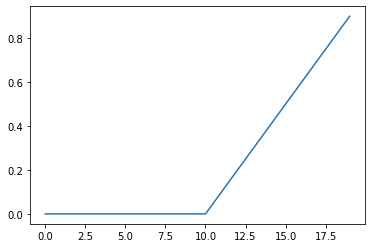

In [46]:
plt.plot(tf.maximum(0, random));